<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/SEP30-31/mcmc_BT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

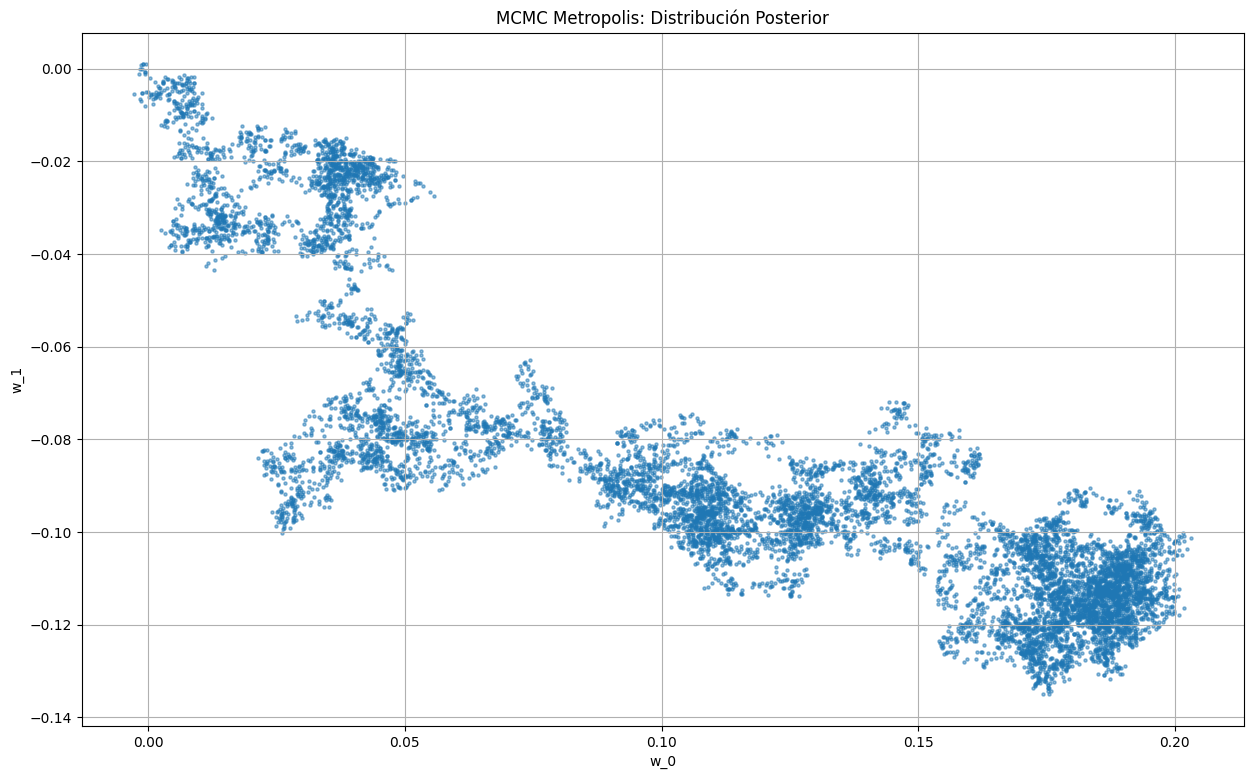

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Establecer la semilla para datos de random
random.seed(42)

# Datos de las carreras olímpicas de 100 metros
data = np.loadtxt("/content/olympic100m_men.txt",delimiter = ",").T
x=data[0]
y=data[1]



# Función del modelo
def model(w_0, w_1, x):
    return w_0 + w_1 * x

# Función de verosimilitud
def likelihood(theta):
    w_0, w_1 = theta
    sigma_i = 0.1
    error = y - model(w_0, w_1, x)
    return np.sum(error ** 2 / (2 * sigma_i ** 2))

# Función de prior
def prior(theta):
    theta_min = [-2, -2]  # Define los límites para los parámetros
    theta_max = [2, 2]
    if all(theta_min <= theta) and all(theta <= theta_max):
        return 0  # Prior plano dentro del rango
    else:
        return -np.inf  # Prior 0 fuera del rango

# Función de posterior
def posterior(theta):
    return likelihood(theta) + prior(theta)

# Número de muestras a generar
n_samples = 10000

theta_ini = np.array([0, 0])    #parametros iniciales para la variable thera_ini
sigma = 0.001
# Almacenar
samples = []  #Esta variable sera para almacenar los samples

# Algoritmo MCMC Metropolis
for _ in range(n_samples):
    theta_prop = theta_ini + np.random.normal(scale=sigma, size=2)  #generar valores random entre los valores de sigma

    ln_posterior_ratio = np.log(posterior(theta_prop)) - np.log(posterior(theta_ini))

    if np.log(np.random.rand()) < ln_posterior_ratio:
        theta_ini = theta_prop
    samples.append(theta_ini)

samples = np.array(samples)


# Visualización de los resultados
plt.figure(figsize=(15, 9))
plt.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5)
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.title('MCMC Metropolis: Distribución Posterior')
plt.grid(True)
plt.show()


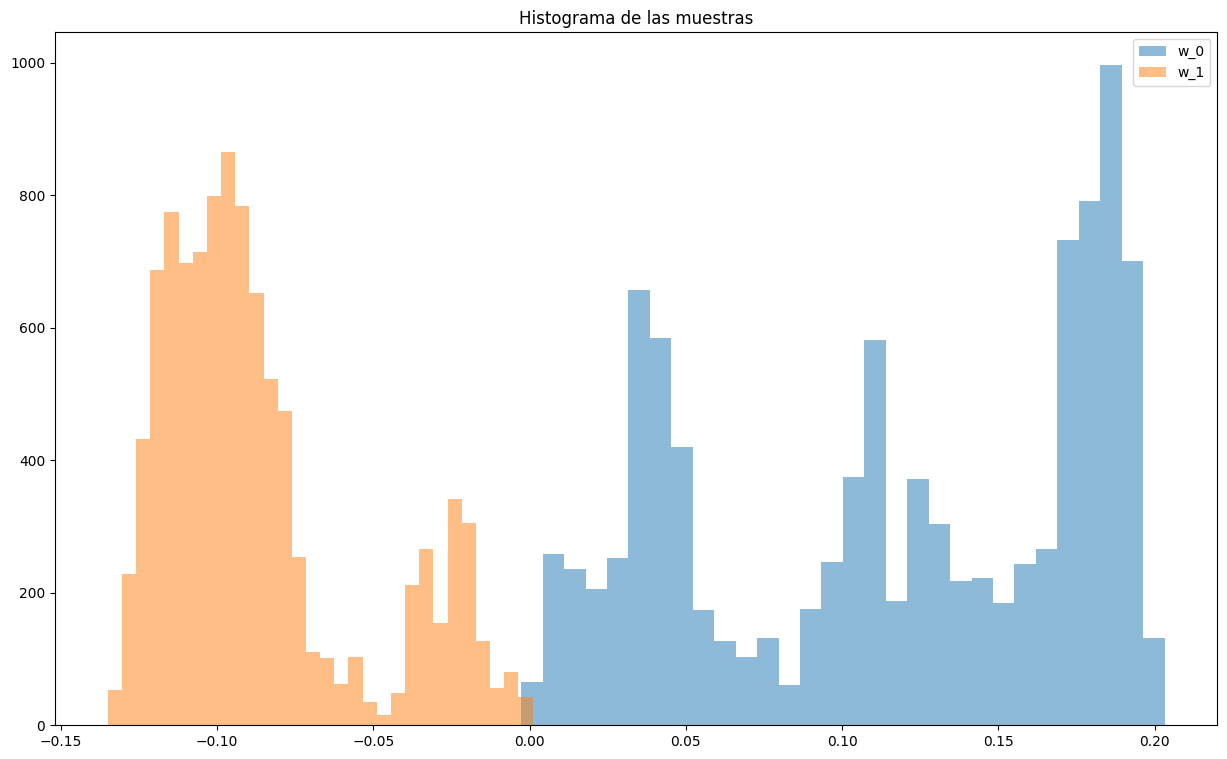

In [23]:
plt.figure(figsize=(15,9))
plt.hist(samples[:, 0], bins=30, alpha=0.5, label='w_0')
plt.hist(samples[:, 1], bins=30, alpha=0.5, label='w_1')
plt.legend(loc='upper right')
plt.title('Histograma de las muestras')
plt.show()

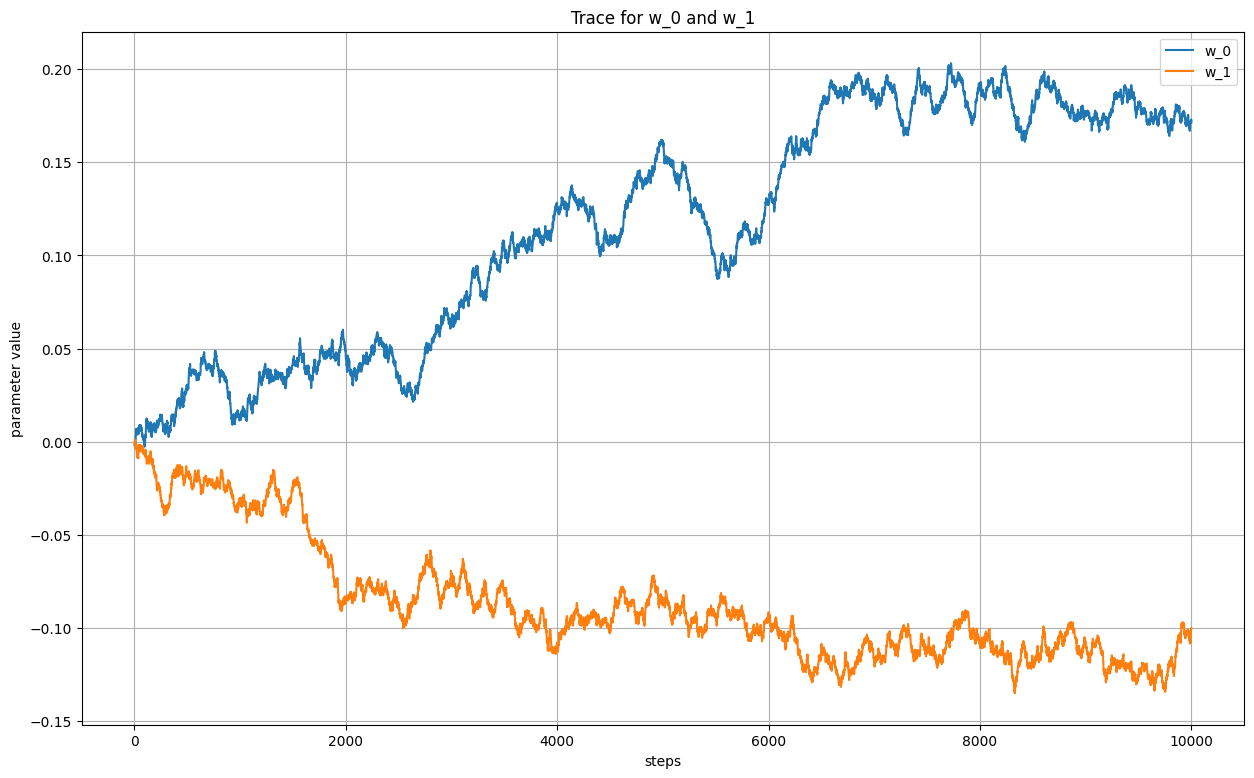

In [24]:
samples = np.array(samples)

plt.figure(figsize=(15, 9))
plt.plot(samples[:, 0], label='w_0')
plt.plot(samples[:, 1], label='w_1')
plt.title('Trace for w_0 and w_1')
plt.xlabel('steps')
plt.ylabel('parameter value')
plt.legend()
plt.grid(True)
plt.show()

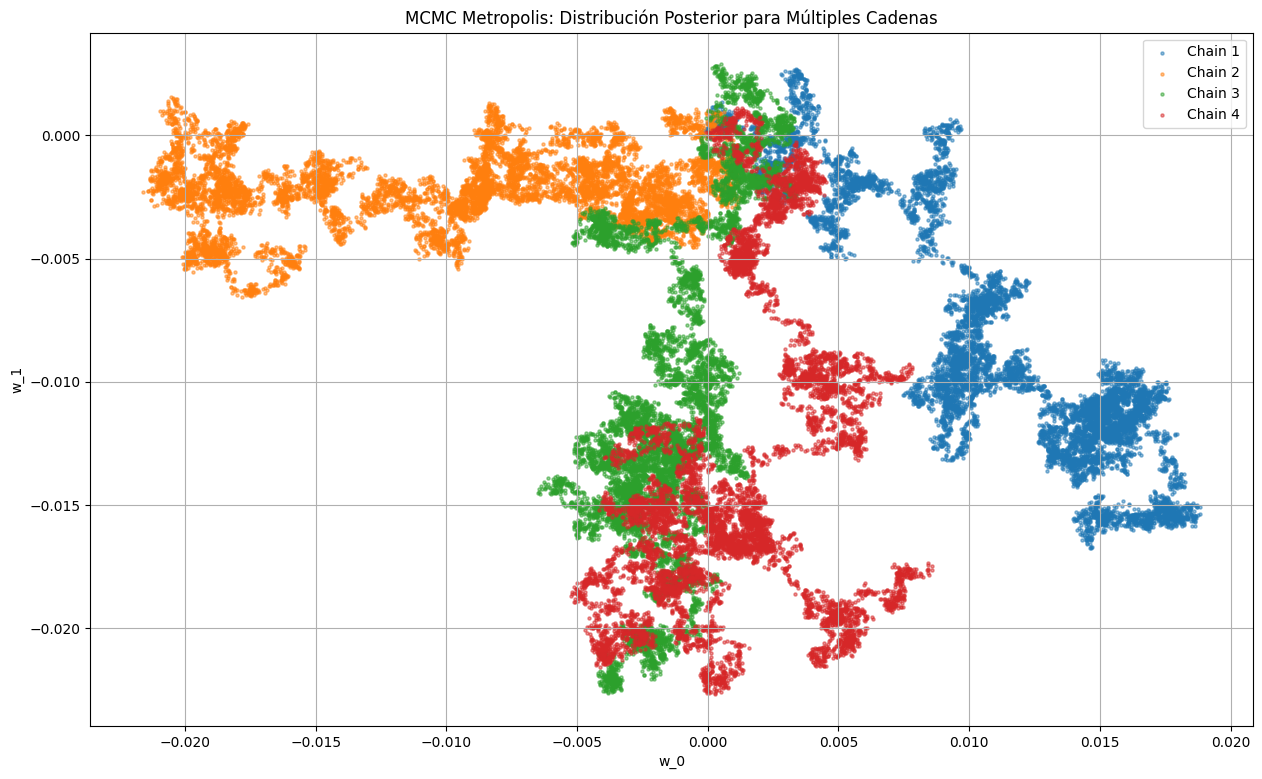

Gelman-Rubin para w_0: 1.0001342687756112
Gelman-Rubin para w_1: 0.9999928873787008


In [46]:

import numpy as np
import matplotlib.pyplot as plt
import random

# Establecer la semilla para datos de random
random.seed(42)

# Datos de las carreras olímpicas de 100 metros
data = np.loadtxt("/content/olympic100m_men.txt", delimiter=",").T
x = data[0]
y = data[1]

# Función del modelo
def model(w_0, w_1, x):
    return w_0 + w_1 * x

# Función de verosimilitud
def likelihood(theta):
    w_0, w_1 = theta
    sigma_i = 0.1
    error = y - model(w_0, w_1, x)
    return np.sum(error ** 2 / (2 * sigma_i ** 2))

# Función de prior
def prior(theta):
    theta_min = [-2, -2]  # Define los límites para los parámetros
    theta_max = [2, 2]
    if all(theta_min <= theta) and all(theta <= theta_max):
        return 0  # Prior plano dentro del rango
    else:
        return -np.inf  # Prior 0 fuera del rango

# Función de posterior
def posterior(theta):
    return likelihood(theta) + prior(theta)

# Número de muestras a generar
n_samples = 10000

# Número de cadenas
n_chains = 4

# Inicialización de las cadenas
chains = [np.array([0, 0]) for _ in range(n_chains)]

# Almacenamiento de resultados por cadena
samples_per_chain = [[] for _ in range(n_chains)]

# Parámetro de escala
sigma = 0.0001

# Algoritmo MCMC Metropolis para cada cadena
for i in range(n_samples):
    for chain_id in range(n_chains):
        theta_ini = chains[chain_id]
        theta_prop = theta_ini + np.random.normal(scale=sigma, size=2)

        ln_posterior_ratio = np.log(posterior(theta_prop)) - np.log(posterior(theta_ini))

        if np.log(np.random.rand()) < ln_posterior_ratio:
            chains[chain_id] = theta_prop

        samples_per_chain[chain_id].append(chains[chain_id])

# Convertir listas de muestras a matrices
samples_per_chain = [np.array(samples) for samples in samples_per_chain]

# Visualización de los resultados
plt.figure(figsize=(15, 9))
for chain_id, samples in enumerate(samples_per_chain):
    plt.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5, label=f'Chain {chain_id + 1}')

plt.xlabel('w_0')
plt.ylabel('w_1')
plt.title('MCMC Metropolis: Distribución Posterior para Múltiples Cadenas')
plt.legend()
plt.grid(True)
plt.show()

# Diagnóstico de Gelman-Rubin
def gelman_rubin(chains):
    m = len(chains)
    n = len(chains[0])
    B_n = np.sum((np.mean(chains, axis=1) - np.mean(chains)) ** 2) / (m - 1)
    s2 = np.mean([np.var(chain, ddof=1) for chain in chains])
    W = np.mean([np.var(chain, ddof=1) for chain in chains])
    var = ((n - 1) / n) * s2 + (B_n / n)
    R = np.sqrt(var / W)
    return R

# Calcular el diagnóstico de Gelman-Rubin para cada parámetro
for i, param_name in enumerate(['w_0', 'w_1']):
    chains_param = np.array([chain[:, i] for chain in samples_per_chain])
    R = gelman_rubin(chains_param)
    print(f'Gelman-Rubin para {param_name}: {R}')
